In [1]:
import pandas as pd
from sklearn.metrics import f1_score
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import os


# Configurando o tamanho padrão de linhas e colunas como MAX para qualquer Df criado
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# configurando para não mostrar notação cientifica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df_clientes = pd.read_csv('../data/train.csv')
df_clientes.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [3]:
df_clientes.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Realmente tem uma linha por cliente ?
df_clientes['id'].is_unique

True

In [5]:
# Passando ID como indice 
df_clientes.set_index('id', inplace=True)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [6]:
df_clientes.shape

(5634, 20)

In [7]:
# Avaliando os tipos de dados
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [8]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5416 non-null   object 
 4   tenure            5173 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5535 non-null   object 
 17

In [9]:
df_clientes['TotalCharges'].dtype.name

'object'

In [10]:
df_clientes['TotalCharges'].value_counts()

TotalCharges
20.2       8
           8
19.55      7
19.75      6
19.9       6
19.45      6
19.65      6
20.05      6
20.25      6
45.3       5
20.15      5
44.4       4
69.6       4
20.3       4
50.15      4
19.3       4
44         4
20.45      4
19.2       4
69.65      4
45.7       3
1284.2     3
20.4       3
70.1       3
49.9       3
19.85      3
470.2      3
74.35      3
20.1       3
50.45      3
35.9       3
24.4       3
50.75      3
69.55      3
74.6       3
19.95      3
220.45     3
69.9       3
20.35      3
85.5       3
70.45      3
74.7       3
69.95      3
80.55      3
75.3       3
69.1       3
70.6       3
69.25      3
45.1       3
19.5       3
383.65     3
44.75      3
25.25      3
70.3       3
1077.5     2
71.65      2
79.15      2
5714.2     2
96.8       2
20.95      2
235.05     2
4858.7     2
2104.55    2
75.35      2
2661.1     2
330.8      2
92.75      2
20.5       2
2560.1     2
469.65     2
223.15     2
300.4      2
398.55     2
86.6       2
70         2
42.9       2

In [11]:
# Vamos retirar os espaços, usando expressão regular \s é qualquer tipo de espaço
df_clientes['TotalCharges'] = df_clientes['TotalCharges'].replace("\s+", "", regex=True)

In [12]:
df_clientes['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

In [ ]:
# Não funciona pq existem valores que não conseguem ter conversão para float
df_clientes.loc[df_clientes['TotalCharges']== ""]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
6755,Male,0,No,Yes,0.00,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0
5219,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6671,Female,0,Yes,Yes,0.00,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0
937,Female,0,Yes,Yes,0.00,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
3827,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
1083,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
3332,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
1341,Female,0,Yes,Yes,0.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0


In [13]:
# para converter podemos utilizar  o método to_numeric com coerção de error
pd.to_numeric(df_clientes['TotalCharges'], errors= 'coerce')

id
4030   2560.10
6731    332.65
6479   6640.70
6861   3545.35
3266   1974.80
6368   3442.80
5830   1848.80
4476     61.05
1508   1008.70
2921   6155.40
3145    110.15
333    4422.95
2140    458.10
3427     69.80
3379   6033.10
3163   1394.55
6471    345.50
2350   6565.85
3756    318.90
305    3141.70
6458    792.15
1124   1611.00
670    4039.30
878    3077.00
1507   3794.50
2258   4847.05
4152   3094.05
4416   4428.45
2989   7880.25
520     265.45
5701   2414.55
4982    712.75
2187    862.40
3008   2276.95
956      44.70
2866   7082.50
982     808.95
3762   5919.35
2295   1253.90
4733   1397.30
979    6383.35
192     531.00
676    7246.15
3451   7308.95
4322   1058.10
3331   4913.30
6666   1224.05
925    1820.90
3090   5646.60
5755    454.05
741    2879.90
4226    158.35
2020   7040.85
1471    156.85
1109   1678.05
832     963.95
3482    214.55
5644     75.90
6152    672.55
5899    800.30
6918   6052.25
3610   6423.00
2474    119.30
3220    571.75
1693    947.75
4811   1424.95
3122   

In [14]:
indices_total_charges_nulo = df_clientes.loc[df_clientes['TotalCharges']== ""].index
indices_total_charges_nulo

Index([6755, 5219, 6671, 937, 3827, 1083, 3332, 1341], dtype='int64', name='id')

In [15]:
pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')[indices_total_charges_nulo]

id
6755   NaN
5219   NaN
6671   NaN
937    NaN
3827   NaN
1083   NaN
3332   NaN
1341   NaN
Name: TotalCharges, dtype: float64

In [16]:
# Ótimo! Ele "força a barra" pra converter tudo que não é numérico para NaN (not a number - "isso não é um número")
df_clientes['TotalCharges'] = pd.to_numeric(df_clientes['TotalCharges'], errors='coerce')

In [17]:
df_clientes.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

# <a> Estatística Descritiva

In [18]:
df_clientes.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
25%,0.00,9.00,35.46,401.59,0.00
50%,0.00,29.00,70.25,1396.12,0.00
75%,0.00,55.00,89.80,3764.29,1.00
max,1.00,72.00,118.75,8684.80,1.00


SeniorCitizen e Churn são discretos, como estão como float acabaram entrando nos valores

<Axes: xlabel='tenure', ylabel='Count'>

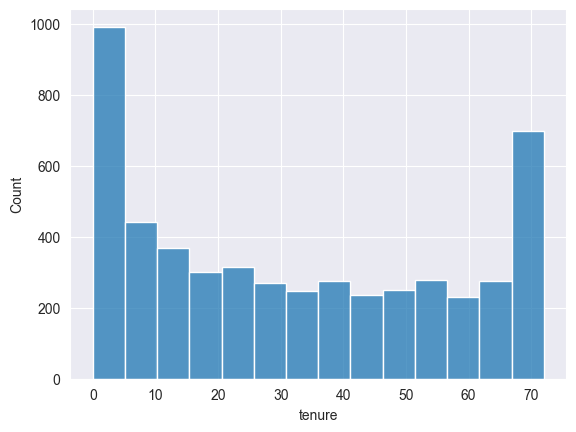

In [19]:
# Analisando a distribuição de tenure ( meses na empresa)
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x = 'tenure')

In [20]:
# valores proximos a zero
len(df_clientes.loc[df_clientes['tenure'] == 0])

8

In [21]:
# valores proximos a zero
len(df_clientes.loc[df_clientes['tenure'] < 5])

893

In [22]:
# valores proximos a zero
len(df_clientes.loc[df_clientes['tenure'] <= 5]) / df_clientes.shape[0] * 100

17.607383741569045

In [23]:
# valores proximos a 70
len(df_clientes.loc[df_clientes['tenure'] == 72])

259

In [24]:
# Mudando o padrão de quartis para decis. Linspace divide em espaços iguais um intervalo de numeros ( 0 a 1 com 11 intervalos)
df_clientes.describe(percentiles=np.linspace(0, 1, 11))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
0%,0.00,0.00,18.25,18.80,0.00
10%,0.00,2.00,20.05,85.50,0.00
20%,0.00,6.00,25.10,267.00,0.00
30%,0.00,12.00,45.80,550.98,0.00
40%,0.00,20.00,58.60,939.80,0.00
50%,0.00,29.00,70.25,1396.12,0.00


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

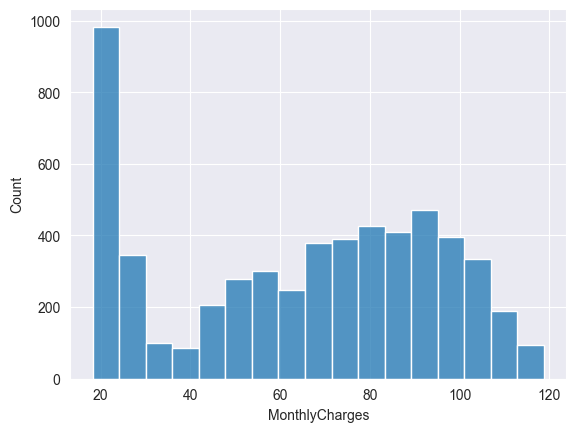

In [25]:
# Analisando a distribuição de MonthlyCharges
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x = 'MonthlyCharges')

<Axes: xlabel='TotalCharges', ylabel='Count'>

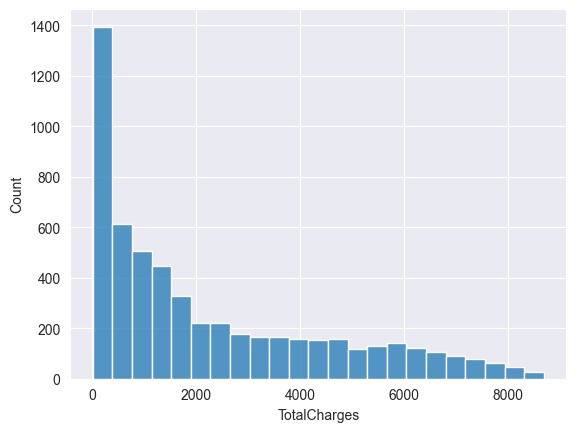

In [26]:
#Analisando a distribuição de MonthlyCharges
sns.set_style("darkgrid")
plt.tight_layout()

sns.histplot(data=df_clientes, x = 'TotalCharges')

<Axes: xlabel='Churn', ylabel='count'>

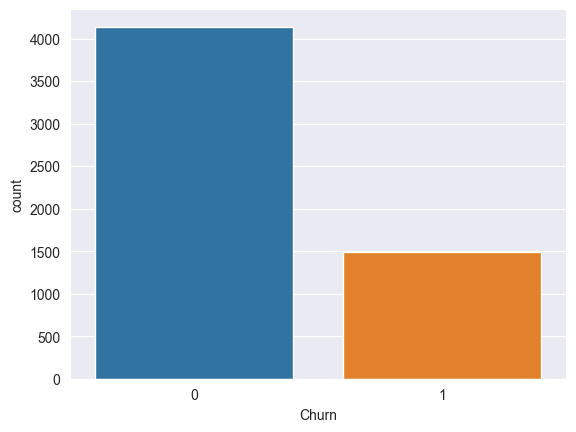

In [27]:
sns.countplot(data=df_clientes, x = 'Churn')

Como a base é bastante desbalanceada temos que ter cuidado com a métrica usada 

In [28]:
len(df_clientes.loc[df_clientes['Churn'] == 0]), len(df_clientes.loc[df_clientes['Churn'] == 1])

(4139, 1495)

Se teoricamente quisermos testar essa acuracia, e falar que todas as respostas do nosso modelo são " 0 " ou seja, o cliente não vai sair 

In [29]:
# Se o modelo chutar  tudo como "não saiu da empresa"
100*len(df_clientes.loc[df_clientes['Churn']==0])/df_clientes.shape[0]

73.46467873624424

Ou seja, acuracia perto de 73% quer dizer que usamos machine learning para nada xD

# <a> Relação entre features e a variável target

Avaliando a relação entre as variaveis preditoras e a target

c:\Users\igors\Documentos\Estudo_python\Jornada_cientista_de_dados\Projeto_3\proj3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


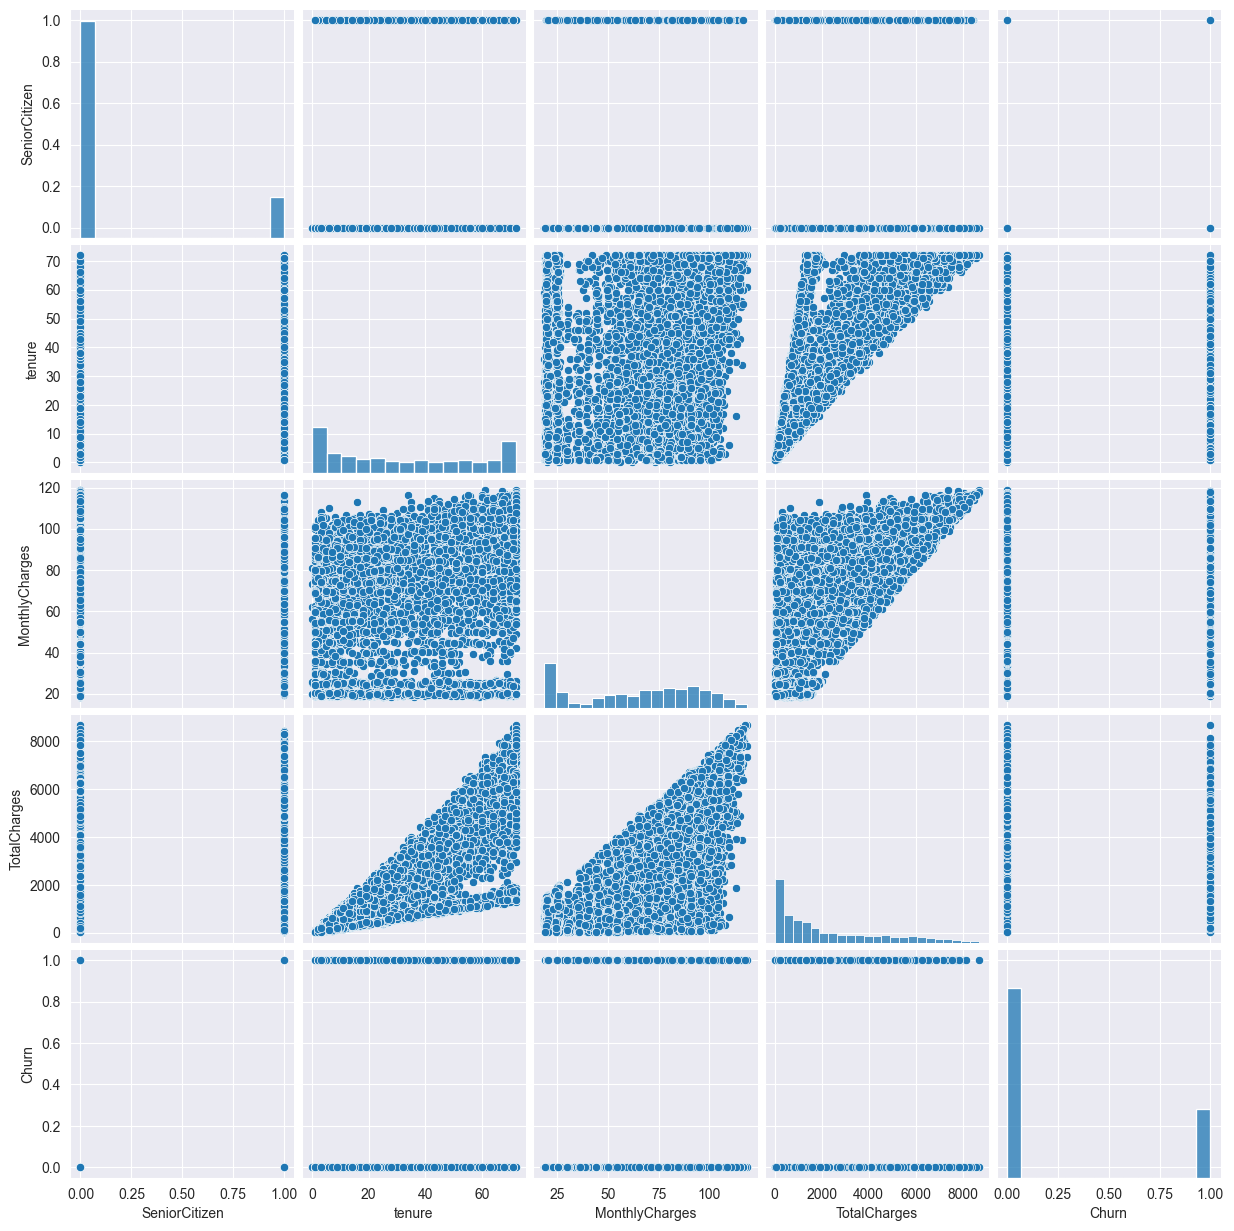

In [30]:
# O pairplot faz gráficos de dispersão para os pares de variáveis ( incluindo a target)
# Na diagonal principal ele mostra histograma
sns.pairplot(data = df_clientes)

# <a> Codificação de variáveis Categoricas

In [31]:
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.10,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


Analisando quantas são variaveis categoricas

In [32]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data()]
colunas_categoricas

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [33]:
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

gender
Male      2849
Female    2785
Name: count, dtype: int64

Partner
No     2902
Yes    2732
Name: count, dtype: int64

Dependents
No     3793
Yes    1623
Name: count, dtype: int64

PhoneService
Yes    5082
No      552
Name: count, dtype: int64

MultipleLines
No                  2692
Yes                 2390
No phone service     552
Name: count, dtype: int64

InternetService
Fiber optic    2451
DSL            1959
No             1224
Name: count, dtype: int64

OnlineSecurity
No                     2763
Yes                    1647
No internet service    1224
Name: count, dtype: int64

OnlineBackup
No                     2488
Yes                    1922
No internet service    1224
Name: count, dtype: int64

DeviceProtection
No                     2480
Yes                    1930
No internet service    1224
Name: count, dtype: int64

TechSupport
No                     2793
Yes                    1617
No internet service    1224
Name: count, dtype: int64

StreamingTV
No                     2240
Yes                    2170
No internet service    1224
Name: count, dtype: int64

StreamingMovies
No                     2218
Yes                    2192
No internet service    1224
Name: count, dtype: int64

Contract
Month-to-month    3084
Two year          1358
One year          1192
Name: count, dtype: int64

PaperlessBilling
Yes    3312
No     2322
Name: count, dtype: int64

PaymentMethod
Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: count, dtype: int64

In [34]:
# Mapear gender,partner, dependents, phone service e paperless billing
df_clientes['gender'] = df_clientes['gender'].map({'Female': 1, 'Male': 0})

colunas_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for coluna_binaria in colunas_binarias:
    df_clientes[coluna_binaria] = df_clientes[coluna_binaria].map({'Yes': 1, 'No': 0})

In [35]:
# testando se funcionou

display(df_clientes['gender'].value_counts())

for colunas_binaria in colunas_binarias:
    display(df_clientes[colunas_binaria].value_counts())

gender
0    2849
1    2785
Name: count, dtype: int64

Partner
0    2902
1    2732
Name: count, dtype: int64

Dependents
0.00    3793
1.00    1623
Name: count, dtype: int64

PhoneService
1    5082
0     552
Name: count, dtype: int64

PaperlessBilling
1    3312
0    2322
Name: count, dtype: int64

In [36]:
df_clientes.loc[:, colunas_binarias + ['gender']].isnull().sum()

Partner               0
Dependents          218
PhoneService          0
PaperlessBilling      0
gender                0
dtype: int64

In [37]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data()]
colunas_categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [38]:
for coluna_categorica in colunas_categoricas:
    display(df_clientes[coluna_categorica].value_counts())

MultipleLines
No                  2692
Yes                 2390
No phone service     552
Name: count, dtype: int64

InternetService
Fiber optic    2451
DSL            1959
No             1224
Name: count, dtype: int64

OnlineSecurity
No                     2763
Yes                    1647
No internet service    1224
Name: count, dtype: int64

OnlineBackup
No                     2488
Yes                    1922
No internet service    1224
Name: count, dtype: int64

DeviceProtection
No                     2480
Yes                    1930
No internet service    1224
Name: count, dtype: int64

TechSupport
No                     2793
Yes                    1617
No internet service    1224
Name: count, dtype: int64

StreamingTV
No                     2240
Yes                    2170
No internet service    1224
Name: count, dtype: int64

StreamingMovies
No                     2218
Yes                    2192
No internet service    1224
Name: count, dtype: int64

Contract
Month-to-month    3084
Two year          1358
One year          1192
Name: count, dtype: int64

PaymentMethod
Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: count, dtype: int64

In [39]:
df_clientes['Contract'] = df_clientes['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_clientes['InternetService'] = df_clientes['InternetService'].map({'DSL': 1, 'Fiber optic': 2, 'No': 0})
df_clientes['PaymentMethod'] = df_clientes['PaymentMethod'].map({'Electronic check': 1,
                                                                 'Mailed check': 0, 
                                                                 'Bank transfer (automatic)': 2, 
                                                                 'Credit card (automatic)': 3})

In [40]:
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1


In [41]:
df_clientes.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents          float64
tenure              float64
PhoneService          int64
MultipleLines        object
InternetService       int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling      int64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [42]:
colunas_categoricas = [coluna for coluna in df_clientes.columns if coluna not in df_clientes._get_numeric_data()]
colunas_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [43]:
# Vamos utilizar OHE para variaveis categoricas nominais
from sklearn.preprocessing import OneHotEncoder

In [44]:
ohe = OneHotEncoder(sparse = False, drop = 'first')
df_ohe_transformadas = ohe.fit_transform(df_clientes[colunas_categoricas])
ohe.categories_

c:\Users\igors\Documentos\Estudo_python\Jornada_cientista_de_dados\Projeto_3\proj3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [45]:
ohe.get_feature_names_out()

array(['MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

In [46]:
df_ohe_transformadas

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [47]:
df_ohe_transformadas = pd.DataFrame(df_ohe_transformadas, columns=ohe.get_feature_names_out(), index=df_clientes.index)
df_ohe_transformadas.head()

,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,
4030,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [48]:
df_ohe_transformadas.shape

(5634, 14)

In [49]:
df_clientes = pd.concat([df_clientes, df_ohe_transformadas], axis=1)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,No phone service,1,Yes,Yes,Yes,Yes,No,No,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,Yes,2,No,Yes,Yes,Yes,Yes,Yes,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,Yes,2,No,Yes,Yes,No,Yes,Yes,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,No,2,No,No,No,No,No,No,0,1,1.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [50]:
colunas_categoricas

['MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [51]:
df_clientes = df_clientes.drop(colunas_categoricas, axis=1)
df_clientes.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,0,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,0.00,19.65,332.65,0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,1,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,1.00,70.75,1974.80,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [52]:
df_clientes.dtypes

gender                                    int64
SeniorCitizen                             int64
Partner                                   int64
Dependents                              float64
tenure                                  float64
PhoneService                              int64
InternetService                           int64
Contract                                  int64
PaperlessBilling                          int64
PaymentMethod                           float64
MonthlyCharges                          float64
TotalCharges                            float64
Churn                                     int64
MultipleLines_No phone service          float64
MultipleLines_Yes                       float64
OnlineSecurity_No internet service      float64
OnlineSecurity_Yes                      float64
OnlineBackup_No internet service        float64
OnlineBackup_Yes                        float64
DeviceProtection_No internet service    float64
DeviceProtection_Yes                    

# <a> Determinando quem são as váveis preditoras e varáveis target

In [53]:
df_clientes.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [57]:
X = df_clientes.drop('Churn', axis=1) # tirando a variavel dependente
y = df_clientes[['Churn']] # variavel dependente

In [58]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
4030,1,0,0,0.00,56.00,0,1,2,0,NaN,45.05,2560.10,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00
6731,0,0,1,1.00,NaN,1,0,1,0,0.00,19.65,332.65,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
6479,1,0,1,0.00,60.00,1,2,2,1,3.00,110.80,6640.70,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6861,1,0,0,0.00,37.00,1,2,0,1,2.00,101.90,3545.35,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
3266,0,0,1,1.00,29.00,1,2,0,1,1.00,70.75,1974.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [59]:
y.head()# Variavel dependente, ou target, ou label

,Churn
id,
4030,0
6731,0
6479,0
6861,1
3266,1


# <a> Separação de base

In [60]:
# A função que separa nossa base em treino e teste!
# Lembrando que faremos cross validation com a base de treino
from sklearn.model_selection import train_test_split

In [62]:
# Devolve uma tupla com 4 elementos: X de treino, X de teste, y de treino e y de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, #Preditoras
                                                         y, # Target
                                                         test_size=0.2,
                                                         random_state=42)

# Vamos ver quantas linhas ficamos com treino e teste
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((4507, 26), (1127, 26), (4507, 1), (1127, 1))

In [63]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,NaN,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,NaN,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [64]:
X_teste.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
1998,1,0,1,1.00,67.00,1,2,2,1,2.00,105.65,6717.90,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
6996,0,0,0,1.00,57.00,1,1,2,0,0.00,89.55,5012.35,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
4668,1,0,1,0.00,20.00,1,0,0,0,2.00,19.25,375.25,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
2799,0,0,0,0.00,NaN,1,2,0,1,1.00,94.90,1048.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
5110,0,0,1,1.00,66.00,1,1,2,0,0.00,65.85,4097.05,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00


In [65]:
y_treino.head()

,Churn
id,
3559,0
896,0
3600,0
6991,0
5455,1


In [66]:
y_teste.head()

,Churn
id,
1998,0
6996,0
4668,0
2799,1
5110,0


In [67]:
X_treino.shape[0] / X.shape[0]

0.7999645012424565

# <a> Tratamento de dados faltantes

In [68]:
# Isnull busca quem é nulo 
X_treino.isnull().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                              171
tenure                                  366
PhoneService                              0
InternetService                           0
Contract                                  0
PaperlessBilling                          0
PaymentMethod                            78
MonthlyCharges                            0
TotalCharges                              6
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service 

In [80]:
# Quantos % estamos perdendo por falta de dados
X_treino['tenure'].isnull().sum() / len(X_treino['tenure']) *100

8.120701131573108

In [70]:
X_teste.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                              47
tenure                                  95
PhoneService                             0
InternetService                          0
Contract                                 0
PaperlessBilling                         0
PaymentMethod                           21
MonthlyCharges                           0
TotalCharges                             2
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [81]:
# O mais simples é utilizar as medidas de tendencia central
# Antes disso vamos guardar os X originais para tentar outras formas mais tarde

X_treino_original = X_treino.copy()
X_teste_original = X_teste.copy()

y_treino_original = y_treino.copy()
y_teste_original = y_teste.copy()

In [82]:
X_treino.loc[:, X_treino.isnull().sum() > 0].columns

Index(['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges'], dtype='object')

In [83]:
X_teste.loc[:, X_teste.isnull().sum() > 0].columns

Index(['Dependents', 'tenure', 'PaymentMethod', 'TotalCharges'], dtype='object')

In [84]:
# Para as variaveis numéricas, vamos utilizar a mediana, para as categoricas vamos utilizar a moda usando metodo de value_counts
mediana_tenure = X_treino['tenure'].median()
mediana_dependents = X_treino['Dependents'].median()
mediana_total_charges = X_treino['TotalCharges'].median()
moda_payment = X_treino['PaymentMethod'].value_counts().index[0]
mediana_tenure, mediana_dependents, mediana_total_charges , moda_payment

(29.0, 0.0, 1389.6, 1.0)

In [86]:
X_treino.loc[X_treino['tenure'].isnull(), 'tenure'] = mediana_tenure
X_treino.loc[X_treino['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment

X_treino.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [87]:
# Não podemos calcular a medida de tendencia central com a base toda! 
# Usamos somente oq foi calculado na base de treino, para completar a base de teste tbm !!!!!!!!!!
X_teste.loc[X_teste['tenure'].isnull(), 'tenure'] = mediana_tenure
X_teste.loc[X_teste['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_teste.loc[X_teste['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_teste.loc[X_teste['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment

X_teste.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

# <a> Usando Machine Learning

In [88]:
# Regressão Logística está no pacote de modelos lineares
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [94]:
# Criando o estimador, algoritmo, modelo, preditor, classificador
# Vamos alterar o número de iterações para cálculo da regressão logística, pois no default  ele enche de warnings
# que pode não ter chegado na melhor solução

regressa_logistica = LogisticRegression(max_iter=500)


In [96]:
type(regressa_logistica)

sklearn.linear_model._logistic.LogisticRegression

In [100]:
#Vamos treinar utilizando cross validation
valores_f1_rl = cross_val_score(estimator=regressa_logistica,
                               X=X_treino,
                                y=y_treino.values.flatten(),
                                cv=10,
                                scoring='f1')
valores_f1_rl

array([0.61946903, 0.58986175, 0.59821429, 0.55506608, 0.6367713 ,
       0.63519313, 0.68122271, 0.57918552, 0.53846154, 0.60792952])

In [101]:
len(valores_f1_rl)

10

In [102]:
media_f1_rl = valores_f1_rl.mean()
f'f1score: {media_f1_rl*100}'

'f1score: 60.4137485787144'

## Vamos tentar com random forest ?

In [104]:
# Modelo de bagging mais famoso 
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

# Vamos treinar utilizando cross validation (sempre!!)
valores_f1_rf = cross_val_score(estimator = random_forest,
                                 X=X_treino,
                                 y=y_treino.values.flatten(),
                                 cv=10,
                                 scoring='f1')
valores_f1_rf

array([0.59907834, 0.56880734, 0.57758621, 0.4537037 , 0.59047619,
       0.60909091, 0.60829493, 0.53271028, 0.55339806, 0.61971831])

In [105]:
media_f1_rf = valores_f1_rf.mean()
f'f1_score: {media_f1_rf*100}'

'f1_score: 57.12864269991711'

## Finalmente, o famoso XGBoost

In [108]:
import xgboost as xgb

In [115]:
xgb_model = xgb.XGBClassifier(random_state=42,
                            objective='binary:logistic',
                            #use_label_encoder=False,
                            eval_metric='error')


In [116]:
type(xgb_model)

xgboost.sklearn.XGBClassifier

In [117]:

# Vamos treinar usando cross validation tbm !!!
valores_f1_xgb = cross_val_score(estimator=xgb_model,
                                 X=X_treino,
                                 y=y_treino.values.flatten(),
                                 cv=10,
                                 scoring='f1')
valores_f1_xgb

array([0.55605381, 0.60344828, 0.58723404, 0.48181818, 0.57009346,
       0.59728507, 0.5814978 , 0.56140351, 0.54716981, 0.59459459])

In [114]:
media_f1_xgb = valores_f1_xgb.mean()

f'f1-score: {media_f1_xgb*100}'

'f1-score: 56.805985497539716'

## Não foi muito bem

A regressão logistica funcionou melhor 

# <a> Feature Engineering

In [118]:
# Buscando somente a coluna tenure para deixar o resto das imputações iguais 
X_treino['tenure'] = X_treino_original['tenure']
X_teste['tenure'] = X_teste_original['tenure']

In [119]:
X_treino['tenure'].isnull().sum()

366

In [121]:
X_teste['tenure'].isnull().sum()

95

In [125]:
X_treino.loc[X_treino['tenure'].isna(), 'tenure'] = \
X_treino.loc[X_treino['tenure'].isna(), 'TotalCharges'] \
/ X_treino.loc[X_treino['tenure'].isna(),'MonthlyCharges']

In [126]:
len(X_treino.loc[X_treino['tenure'].isna()])

0

In [129]:
# Testando modelo com um diferente missing data para tenure
rl_2 = LogisticRegression(max_iter=500)

# Treinando usando cross validation
valores_f1_rl2 = cross_val_score(estimator=rl_2,
                                 X=X_treino,
                                 y=y_treino.values.flatten(),
                                 cv=10,
                                 scoring='f1')
valores_f1_rl2

array([0.63755459, 0.64912281, 0.60606061, 0.56637168, 0.67567568,
       0.64135021, 0.6779661 , 0.60089686, 0.57819905, 0.62162162])

In [130]:
media_f1_rl2 = valores_f1_rl2.mean()

f'f1-score: {media_f1_rl2*100}'

'f1-score: 62.548192027288415'

## Outros tipos de imputação

In [131]:
#Buscando o X original
X_treino['Dependents'].isnull().sum()

0

In [132]:
X_treino['Dependents'] = X_treino_original['Dependents']
X_treino['Dependents'].isnull().sum()

171

In [133]:
# imputação fica em impute
from sklearn.impute import KNNImputer

imputacao_knn = KNNImputer(n_neighbors = 2)
treino_imputado = imputacao_knn.fit_transform(X_treino)
treino_imputado

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [134]:
imputacao_knn.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype=object)

In [135]:
treino_imputado.shape

(4507, 26)

In [136]:
treino_imputado[:,3]

array([0.5, 0. , 1. , ..., 0.5, 1. , 1. ])

In [137]:
X_treino['Dependents'] = treino_imputado[:,3]
X_treino['Dependents'].isnull().sum()

0

In [138]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,1.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [139]:
X_treino_original.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,NaN,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,NaN,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [141]:
# Testando modelo com um diferente missing data para dependents
rl_3 = LogisticRegression(max_iter=500)

# Vamos treinar usando cross validation
valores_f1_rl3 = cross_val_score(estimator=rl_3,
                                 X=X_treino,
                                 y=y_treino.values.flatten(),
                                 cv=10,
                                scoring = 'f1')

valores_f1_rl3

array([0.61607143, 0.6460177 , 0.63203463, 0.56      , 0.6460177 ,
       0.64705882, 0.6695279 , 0.60869565, 0.58215962, 0.61607143])

In [142]:
media_f1_rl3 = valores_f1_rl3.mean()

f'f1-score: {media_f1_rl3*100}'

'f1-score: 62.23654884519757'

## Ultima tentativa, com diversas variaveis categoricas novas( binarias)

In [143]:
X_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
id,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
896,0,0,0,0.00,30.00,1,2,0,1,1.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [148]:
# O cliente tem ou não tem internet 

X_treino['tem_internet'] = X_treino['InternetService'].isin([1,2]).astype(int)

# Possui alguma fidelidade ?
X_treino['tem_fidelidade'] = X_treino['Contract'].isin([1,2]).astype(int)

# Vamos contar a quantidade de serviços que o cliente tem contratado
X_treino['numero_de_servicos'] = X_treino['tem_internet'] + X_treino['OnlineSecurity_Yes']+\
                                X_treino['MultipleLines_Yes'] + X_treino['OnlineBackup_Yes']+\
                                X_treino['DeviceProtection_Yes'] + X_treino['TechSupport_Yes']+\
                                X_treino['StreamingTV_Yes'] + X_treino['StreamingMovies_Yes'] +\
                                X_treino['PhoneService']

# Vamos criar um valor por media de cobrança ?
X_treino['media_cobranca_por_servico'] = X_treino['MonthlyCharges'] / X_treino['numero_de_servicos']

X_treino.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,tem_internet,tem_fidelidade,numero_de_servicos,media_cobranca_por_servico
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3559,0,0,1,0.50,28.00,1,2,1,0,2.00,92.20,2568.15,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,1,5.00,18.44
896,0,0,0,0.00,30.00,1,2,0,1,1.00,94.30,2679.70,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1,0,6.00,15.72
3600,1,0,1,1.00,45.00,1,1,0,0,0.00,81.30,3541.10,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1,0,8.00,10.16
6991,0,0,1,0.00,36.00,1,2,0,1,1.00,93.60,3366.05,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,0,5.00,18.72
5455,1,1,1,0.00,1.00,1,2,0,1,1.00,69.55,69.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,0,2.00,34.77


In [149]:
# testando o modelo novamente com um novo missing data
rl_4 = LogisticRegression(max_iter=500)

# Treinando usando cross validation
valores_f1_rl4 = cross_val_score(estimator=rl_4,
                                 X=X_treino,
                                 y=y_treino.values.flatten(),
                                 cv=10,
                                 scoring='f1')
valores_f1_rl4

array([0.64317181, 0.65217391, 0.60085837, 0.56768559, 0.63436123,
       0.65560166, 0.6637931 , 0.60714286, 0.59259259, 0.63436123])

In [150]:
media_f1_rf4 = valores_f1_rl4.mean()

f'f1-score: {media_f1_rf4*100}'

'f1-score: 62.51742357724357'

# <a> Modelo Campeão

In [151]:
# mexemops bastante no X_treino desde o 1 modelo, vamos retomar os dados originais
X_treino = X_treino_original
X_treino.loc[X_treino['tenure'].isna(),'tenure'] = X_treino.loc[X_treino['tenure'].isna(),'TotalCharges'] / X_treino.loc[X_treino['tenure'].isna(), 'MonthlyCharges']
X_treino.loc[X_treino['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_treino.loc[X_treino['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_treino.loc[X_treino['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment

In [152]:
# Mesmo com teste
X_teste = X_teste_original
X_teste.loc[X_teste['tenure'].isna(),'tenure'] = X_teste.loc[X_teste['tenure'].isna(),'TotalCharges'] / X_teste.loc[X_teste['tenure'].isna(), 'MonthlyCharges']
X_teste.loc[X_teste['Dependents'].isnull(), 'Dependents'] = mediana_dependents
X_teste.loc[X_teste['TotalCharges'].isnull(), 'TotalCharges'] = mediana_total_charges
X_teste.loc[X_teste['PaymentMethod'].isnull(), 'PaymentMethod'] = moda_payment

In [154]:
X_teste.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
InternetService                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No internet service    0
DeviceProtection_Yes                    0
TechSupport_No internet service         0
TechSupport_Yes                         0
StreamingTV_No internet service         0
StreamingTV_Yes                   

In [155]:
regressa_logistica.fit(X_treino, y_treino.values.flatten())

LogisticRegression(max_iter=500)

In [156]:
regressa_logistica.coef_

array([[ 1.46796182e-02,  3.35735303e-01, -1.89400750e-02,
        -1.35351181e-01, -7.21451082e-02, -4.97597533e-01,
         5.16720027e-01, -7.04987505e-01,  4.47674205e-01,
        -4.88017750e-03,  2.66365024e-03,  4.64851067e-04,
         1.34450163e-01,  2.12251379e-01, -1.01757742e-01,
        -6.13603915e-01, -1.01757742e-01, -2.64028250e-01,
        -1.01757742e-01, -1.65498013e-01, -1.01757742e-01,
        -4.61406001e-01, -1.01757742e-01,  2.58997042e-01,
        -1.01757742e-01,  1.67580900e-01]])

In [158]:
df_coeficientes = pd.DataFrame(regressa_logistica.coef_)
df_coeficientes.columns = regressa_logistica.feature_names_in_
df_coeficientes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.01,0.34,-0.02,-0.14,-0.07,-0.50,0.52,-0.70,0.45,-0.00,0.00,0.00,0.13,0.21,-0.10,-0.61,-0.10,-0.26,-0.10,-0.17,-0.10,-0.46,-0.10,0.26,-0.10,0.17


# <a> Finalmente 

In [160]:
# Ver estimadores scikit learn
# estimador é treinado com fit
# estimador prediz com predict
predicoes_churn = regressa_logistica.predict(X_teste)
predicoes_churn[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [161]:
len(predicoes_churn)

1127

In [162]:
y_teste.head()

,Churn
id,
1998,0
6996,0
4668,0
2799,1
5110,0


In [163]:
predicoes_vs_real = pd.DataFrame({'predicao': predicoes_churn.flatten(), 'real':y_teste.values.flatten()})
predicoes_vs_real.head(20)

,predicao,real
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [164]:
# Sera que uma simples média é melhor do que o modelo, vamos testar o r quadrado
from sklearn.metrics import f1_score

f1_score(y_true=y_teste, y_pred = predicoes_churn)


0.58348623853211

58,34% de f1-score, existe uma queda entre modelo de treino e de teste 

In [165]:
# Observando a acuracia
from sklearn.metrics import accuracy_score
accuracy_score(y_true=y_teste, y_pred=predicoes_churn)

0.7985803016858918

79,85% esta melhor que os 73% de antes